In [160]:
import importlib
import numpy
from scripts import NN
import math as m
from scripts import io
importlib.reload(NN)
importlib.reload(io)
import random as rand
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


these chunks implement the auto encoder

In [2]:
setup = [8,3,8]
alpha = 0.5
lamba = 0 #any weight decay fails to converge
batch_size = 500 #how many examples to step through before updating weights
bias  = 1 #actually should get rid of this
auto_NN = NN.NeuralNetwork(setup,NN.activation,alpha,lamba,batch_size,bias)

In [3]:
epoch_number = 100000
cost_list = []
batch_number = 1
input_size   = 8
for j in range(epoch_number):
    training_batch = numpy.zeros((input_size))
    rand_index = int(numpy.ceil(rand.random()*8)-1)
    training_batch[rand_index] = 1
    training_batch = [training_batch]
    training_answer = training_batch
    auto_NN.get_training_set(training_batch,training_answer)
    cost_list.append(auto_NN.batch_descent())

In [5]:
auto_NN.get_single_input([0,1,0,0,0,0,0,0])
auto_NN.feedforward()
print("final output",auto_NN.layer_a)
print("final edge matrices",auto_NN.edge_matrices)
print("final biases",auto_NN.biases)

final output [array([0.96814126, 0.9821459 , 0.006298  ]), array([2.56776456e-02, 9.71834316e-01, 8.22715032e-06, 1.07607523e-09,
       1.35757495e-02, 1.00335423e-05, 1.38091441e-02, 3.59502177e-06])]
final edge matrices [array([[ 5.53478965,  3.843963  ,  3.89209979, -4.05165839, -4.09690669,
        -4.44539717,  2.98373378, -4.08034993],
       [ 4.89311589,  4.27185859, -5.06170982, -3.90993464,  3.23319095,
         4.10327712, -3.72912144, -4.03676307],
       [ 5.29490458, -4.69328623,  3.6008267 ,  3.12199185, -3.61293901,
         4.34254491, -4.23053348, -4.15712481]]), array([[ 6.86110011,  6.60259312,  6.76405494],
       [ 7.38071237,  7.33849491, -8.22353967],
       [ 7.45689332, -8.44748469,  7.30932123],
       [-8.57539023, -8.63990563,  8.31995405],
       [-8.71077379,  8.32781108, -8.52528248],
       [-8.12052993,  7.33157369,  7.46535297],
       [ 8.45310311, -8.63593901, -8.87516541],
       [-8.51219028, -8.29086983, -8.41653809]])]
final biases [array([-0.4

these chunks implement a simple classifier

In [28]:
setup = [8,3,1]
alpha = 0.5
lamba = 0 #0.1 is good
batch_size = 10
bias  = 1
classy_NN = NN.NeuralNetwork(setup,NN.activation,alpha,lamba,batch_size,bias)

In [30]:
epoch_number = 10000
cost_list = []
batch_number = 1
input_size   = 8
output_size  = 1
for j in range(epoch_number):
    training_list = []
    answer_list   = []
    for k in range(batch_size):
        training_batch = numpy.zeros((input_size))
        training_answer = numpy.zeros((output_size))
        rand_index = int(numpy.ceil(rand.random()*8)-1)
        training_batch[rand_index] = 1
        training_list.append(training_batch)
        if rand_index > 3: 
            training_answer[0] = 1
        answer_list.append(training_answer)
    classy_NN.get_training_set(training_list,answer_list)
    cost_list.append(classy_NN.batch_descent())

In [35]:
classy_NN.get_single_input([0,0,0,0,0,0,0,1])
classy_NN.feedforward()
print("final output",classy_NN.layer_a)
print("final edge matrices",classy_NN.edge_matrices)
print("final biases",classy_NN.biases)

final output [array([0.27759873, 0.18524872, 0.8651533 ]), array([0.98150834])]
final edge matrices [array([[ 0.88900945,  0.88109641,  0.88143009,  0.8764948 , -0.89631189,
        -0.9042514 , -0.9022423 , -0.90002653],
       [ 1.41579784,  1.4289509 ,  1.4264069 ,  1.42003672, -1.44845237,
        -1.45069935, -1.44494507, -1.44170441],
       [-1.80175996, -1.79553422, -1.80124664, -1.8141863 ,  1.81969393,
         1.82520277,  1.81919401,  1.82331101]]), array([[-2.52025957, -4.32524218,  5.94789733]])]
final biases [array([-0.05637755, -0.0394791 ,  0.03545709]), array([0.32679422])]


these chunks implement classification of rap1 sequences

In [175]:
setup = [68,20,10,1]
alpha = 0.5
lamba = 0 #0.1 is good
batch_size = 10
bias  = 1
rap1_NN = NN.NeuralNetwork(setup,NN.activation,alpha,lamba,batch_size,bias)

In [176]:
rap1_pos_list = io.import_positives('data/rap1-lieb-positives.txt')
genom_neg_list = io.import_negatives('data/yeast-upstream-1k-negative.fa',17)
rap1_test_list = io.import_positives('data/rap1-lieb-test.txt')

In [177]:
epoch_number = 10000 # the number of times through the whole data set
cost_list = []
for j in range(epoch_number):
    batch_cycles = int(numpy.ceil(len(rap1_pos_list)/batch_size)) #the number of batches in data set for a given batch size
    
    for k in range(batch_cycles):
        if k < batch_cycles-1:
            training_list = rap1_pos_list[(k)*batch_size:(k+1)*batch_size]
            rand_index    = int(numpy.floor(rand.random()*(len(genom_neg_list)-batch_size)))
            #print("rand index is", rand_index)
            training_list = training_list + genom_neg_list[rand_index:rand_index+batch_size]
            training_list = io.one_hot_encode(training_list)
            #print("training list norm is",len(training_list))
            answer_list   = numpy.ones((batch_size))
            answer_list   = numpy.concatenate((answer_list,numpy.zeros((batch_size))))
        if k == batch_cycles-1:
            size_temp     = len(rap1_pos_list[k*batch_size:])
            training_list = rap1_pos_list[(k)*batch_size:]
            and_index    = int(numpy.floor(rand.random()*(len(genom_neg_list)-size_temp)))
            training_list = training_list + genom_neg_list[rand_index:rand_index+size_temp]
            training_list = io.one_hot_encode(training_list)
            #print("training list short is ",len(training_list))
            answer_list   = numpy.ones((size_temp))
            answer_list   = numpy.concatenate((answer_list,numpy.zeros((size_temp))))
        
        #print(k)
        #print(training_list)
        #print(answer_list)
        rap1_NN.get_training_set(training_list,answer_list)
        cost_list.append(rap1_NN.batch_descent())

In [178]:
pos_test = io.one_hot_encode([rap1_pos_list[100]])
#pos_test = numpy.transpose(pos_test)
pos_test = pos_test[0]
print(pos_test)
rap1_NN.get_single_input(pos_test)
rap1_NN.feedforward()
print("final output",rap1_NN.layer_a)
print("final edge matrices",rap1_NN.edge_matrices)
print("final biases",rap1_NN.biases)

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
final output [array([0.26009205, 0.56665375, 0.71717486, 0.65567088, 0.34895399,
       0.73316433, 0.2696114 , 0.43231712, 0.28198917, 0.27403435,
       0.57304264, 0.57161181, 0.24441525, 0.72175218, 0.27657997,
       0.72076868, 0.73328369, 0.71276379, 0.7205313 , 0.26967169]), array([0.33915259, 0.39448661, 0.64240458, 0.24377999, 0.3182101 ,
       0.16517164, 0.32831373, 0.91378808, 0.63071495, 0.73274587]), array([0.99614973])]
final edge matrices [array([[ 0.06387376,  0.3523407 ,  0.27763144, ...,  0.2829721 ,
         0.14397058,  0.11818834],
       [ 0.00998827, -0.00983904, -0.00991425, ..., -0.01095335,
        -0.0136587 ,  0.00118594],
       [-0.02594391, -0.18292369, -0.13971268, ..., -0.14445318,
        -0.05283753, -0.04692899],
       ...,
       [-0.0607982

In [127]:
neg_test = io.one_hot_encode([genom_neg_list[100]])
#pos_test = numpy.transpose(pos_test)
neg_test = neg_test[0]
print(neg_test)
rap1_NN.get_single_input(neg_test)
rap1_NN.feedforward()
print("final output",rap1_NN.layer_a)
print("final edge matrices",rap1_NN.edge_matrices)
print("final biases",rap1_NN.biases)

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
final output [array([0.72863558, 0.47703861, 0.53428481, 0.36540405, 0.48309084,
       0.62275252, 0.61099559, 0.51103906, 0.42716572, 0.51483941,
       0.53641979, 0.54807336, 0.48875404, 0.48202713, 0.4980727 ,
       0.5016603 , 0.38518337, 0.45967377, 0.6605626 , 0.55861594]), array([0.54513286, 0.46882699, 0.36612873, 0.29910017, 0.52631573,
       0.82583073, 0.27211496, 0.20625491, 0.67059101, 0.76278744]), array([0.06574843])]
final edge matrices [array([[ 1.06282603e-01,  2.67213153e-01,  1.30047339e-01, ...,
         2.19378619e-01,  3.65996787e-02,  1.22441196e-01],
       [ 4.54143096e-03,  1.97500930e-02, -1.45423372e-03, ...,
         4.82414522e-03, -1.90970566e-02,  2.25483796e-03],
       [ 4.51323976e-02,  1.33635681e-01,  6.27767401e-02, ...,
         9.7903743

In [179]:
test_scores = []
for i in range(len(rap1_test_list)):
    test_test = io.one_hot_encode([rap1_test_list[i]])
    test_test = test_test[0]
    rap1_NN.get_single_input(test_test)
    rap1_NN.feedforward()
    test_scores.append(rap1_NN.layer_a[2][0])

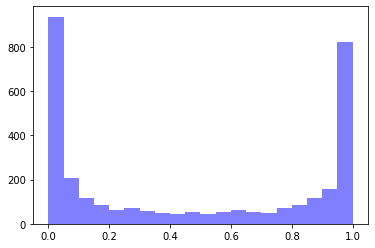

In [180]:
num_bins = 20
n, bins, patches = plt.hist(test_scores, num_bins, facecolor = 'blue', alpha = 0.5)
plt.show()